# Working with Time Series

## Dates and Times in Python

### Native Pythobn dates an times:datetime and dateutil

In [1]:
from datetime import datetime
datetime(year=2015, month=7, day=4)

datetime.datetime(2015, 7, 4, 0, 0)

In [2]:
from dateutil import parser
date = parser.parse("4th of July, 2015")
date

datetime.datetime(2015, 7, 4, 0, 0)

In [6]:
date = parser.parse("2015-04-05")
date

datetime.datetime(2015, 4, 5, 0, 0)

In [7]:
#day of week
date.strftime('%A')

'Sunday'

### Typed arrays of times:Numpy's datetime64

In [8]:
import numpy as np
date = np.array('2015-07-05',dtype = np.datetime64)
date

array(datetime.date(2015, 7, 5), dtype='datetime64[D]')

In [10]:
date +np.arange(12)

array(['2015-07-05', '2015-07-06', '2015-07-07', '2015-07-08',
       '2015-07-09', '2015-07-10', '2015-07-11', '2015-07-12',
       '2015-07-13', '2015-07-14', '2015-07-15', '2015-07-16'], dtype='datetime64[D]')

In [11]:
np.datetime64('2015-06-07')

numpy.datetime64('2015-06-07')

In [14]:
np.datetime64('2015-08-09 12:00')

numpy.datetime64('2015-08-09T12:00')

In [15]:
np.datetime64('2015-08-09 12:59:59.50','ns')

numpy.datetime64('2015-08-09T12:59:59.500000000')

### Dates and times in Pandas:Best of both worlds

In [19]:
import pandas as pd
date = pd.to_datetime("4th of July ,2015")
date

Timestamp('2015-07-04 00:00:00')

In [22]:
#day of week
date.strftime('%A')

'Saturday'

In [23]:
date +pd.to_timedelta(np.arange(12),'D')

DatetimeIndex(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
               '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
               '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
              dtype='datetime64[ns]', freq=None)

## Pandas Time Series:Indexing by Time 

In [24]:
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04',
                          '2015-07-04', '2015-08-04'])
data = pd.Series([0, 1, 2, 3], index=index)
data

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

In [26]:
data['2014-07-04':'2015-07-04']

2014-07-04    0
2014-08-04    1
2015-07-04    2
dtype: int64

In [28]:
data['2015']

2015-07-04    2
2015-08-04    3
dtype: int64

## Pandas Time Series Data Structures     

timestamps:Timestamp    
time perios:Period    
time detals:Timedelta    

In [29]:
dates = pd.to_datetime([datetime(2015, 7, 3), '4th of July, 2015',
                       '2015-Jul-6', '07-07-2015', '20150708'])
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

In [30]:
dates.to_period('D')

PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
             '2015-07-08'],
            dtype='int64', freq='D')

In [31]:
dates - dates[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

### Regular sequences:pd.date_range()

In [33]:
pd.date_range('2015-07-04','2015-09-08')

DatetimeIndex(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
               '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
               '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15',
               '2015-07-16', '2015-07-17', '2015-07-18', '2015-07-19',
               '2015-07-20', '2015-07-21', '2015-07-22', '2015-07-23',
               '2015-07-24', '2015-07-25', '2015-07-26', '2015-07-27',
               '2015-07-28', '2015-07-29', '2015-07-30', '2015-07-31',
               '2015-08-01', '2015-08-02', '2015-08-03', '2015-08-04',
               '2015-08-05', '2015-08-06', '2015-08-07', '2015-08-08',
               '2015-08-09', '2015-08-10', '2015-08-11', '2015-08-12',
               '2015-08-13', '2015-08-14', '2015-08-15', '2015-08-16',
               '2015-08-17', '2015-08-18', '2015-08-19', '2015-08-20',
               '2015-08-21', '2015-08-22', '2015-08-23', '2015-08-24',
               '2015-08-25', '2015-08-26', '2015-08-27', '2015-08-28',
      

In [34]:
pd.date_range('2015-06-07',periods=9)

DatetimeIndex(['2015-06-07', '2015-06-08', '2015-06-09', '2015-06-10',
               '2015-06-11', '2015-06-12', '2015-06-13', '2015-06-14',
               '2015-06-15'],
              dtype='datetime64[ns]', freq='D')

In [41]:
pd.date_range('2015-06-07',periods=9,freq='BM')

DatetimeIndex(['2015-06-30', '2015-07-31', '2015-08-31', '2015-09-30',
               '2015-10-30', '2015-11-30', '2015-12-31', '2016-01-29',
               '2016-02-29'],
              dtype='datetime64[ns]', freq='BM')

In [40]:
pd.timedelta_range(0,periods=10,freq='min')

TimedeltaIndex(['00:00:00', '00:01:00', '00:02:00', '00:03:00', '00:04:00',
                '00:05:00', '00:06:00', '00:07:00', '00:08:00', '00:09:00'],
               dtype='timedelta64[ns]', freq='T')

## Frequencies and Offsets 

In [42]:
pd.timedelta_range(0,periods=9,freq="2H30T")

TimedeltaIndex(['00:00:00', '02:30:00', '05:00:00', '07:30:00', '10:00:00',
                '12:30:00', '15:00:00', '17:30:00', '20:00:00'],
               dtype='timedelta64[ns]', freq='150T')

In [43]:
from pandas.tseries.offsets import BDay
pd.date_range('2015-07-01',periods=5,freq=BDay())

DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-06',
               '2015-07-07'],
              dtype='datetime64[ns]', freq='B')

## Resampling,Shifting,and Windowing

In [46]:
from pandas_datareader import data
goog = data.DataReader('GOOG',start='2004',end='2016',data_source ='yahoo')
goog.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,49.813286,51.835709,47.800831,49.982655,49.982655,44871300
2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942800
2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342800
2004-08-24,55.412300,55.591629,51.591621,52.239193,52.239193,15319700
2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232100


In [47]:
goog = goog['Close']

In [48]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn;
seaborn.set()

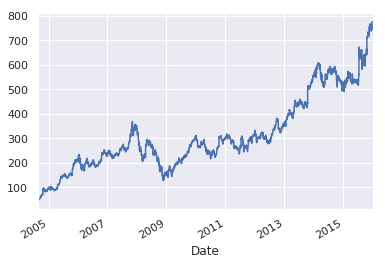

In [49]:
goog.plot()

### Resampling and converting frequencies

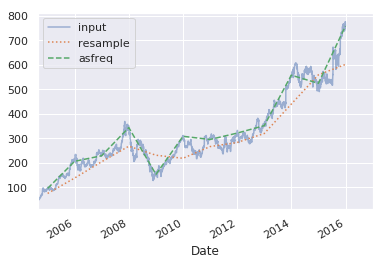

In [52]:
goog.plot(alpha=0.5,style='-')
goog.resample('BA').mean().plot(style=':')
goog.asfreq('BA').plot(style='--')
plt.legend(['input','resample','asfreq'],loc='upper left')

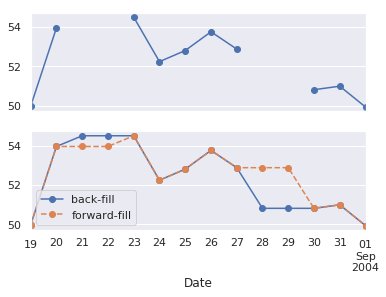

In [53]:
fig, ax = plt.subplots(2, sharex=True)
data = goog.iloc[:10]

data.asfreq('D').plot(ax=ax[0], marker='o')

data.asfreq('D', method='bfill').plot(ax=ax[1], style='-o')
data.asfreq('D', method='ffill').plot(ax=ax[1], style='--o')
ax[1].legend(["back-fill", "forward-fill"]);